# Ensemble Alghorithms:
    1)Voting Classifier
    2)Bagging
    3)Random Forest
    4)Boosting
    

In [1]:
#Book1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_squared_error as MSE

In [2]:
filename = 'heart.csv'

In [3]:
df = pd.read_csv(filename)
print("Done")

Done


In [107]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


# Missing Value

In [108]:
np.sum(df.isna())  #missing value

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [24]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["Ca"], axis=0, inplace = True)
df.dropna(subset=["Thal"], axis=0, inplace = True)

# Encoding

In [25]:
dummy_var = ['ChestPain']
df_new = pd.get_dummies(df,columns=dummy_var,drop_first=False)

In [26]:
df_new

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical
0,1,63,1,145,233,1,2,150,0,2.3,3,0.0,fixed,No,0,0,0,1
1,2,67,1,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,1,0,0,0
2,3,67,1,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,1,0,0,0
3,4,37,1,130,250,0,0,187,0,3.5,3,0.0,normal,No,0,1,0,0
4,5,41,0,130,204,0,2,172,0,1.4,1,0.0,normal,No,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,298,57,0,140,241,0,0,123,1,0.2,2,0.0,reversable,Yes,1,0,0,0
298,299,45,1,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes,0,0,0,1
299,300,68,1,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes,1,0,0,0
300,301,57,1,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes,1,0,0,0


# Splitting the Data (Original DataFrame)

In [32]:
X = df_new.drop(['AHD','Thal'], axis=1)
y = df_new['AHD'].apply(lambda x: 1 if x=='Yes' else 0)


In [33]:
X

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical
0,1,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,0,1
1,2,67,1,160,286,0,2,108,1,1.5,2,3.0,1,0,0,0
2,3,67,1,120,229,0,2,129,1,2.6,2,2.0,1,0,0,0
3,4,37,1,130,250,0,0,187,0,3.5,3,0.0,0,1,0,0
4,5,41,0,130,204,0,2,172,0,1.4,1,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,298,57,0,140,241,0,0,123,1,0.2,2,0.0,1,0,0,0
298,299,45,1,110,264,0,0,132,0,1.2,2,0.0,0,0,0,1
299,300,68,1,144,193,1,0,141,0,3.4,2,2.0,1,0,0,0
300,301,57,1,130,131,0,0,115,1,1.2,2,1.0,1,0,0,0


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42) 

In [35]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
train = pd.concat([X_train,y_train],axis=1)
test = pd.concat([X_test,y_test],axis=1)

In [36]:
X_train_clean = train.drop(['AHD'],axis=1)
y_train_clean = train['AHD']
X_test_clean = test.drop(['AHD'],axis=1)
y_test_clean = test['AHD']

In [37]:
X_train_clean.head()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical
0,271,61,1,140,207,0,2,138,1,1.9,1,1.0,1,0,0,0
1,38,57,1,150,276,0,2,112,1,0.6,2,1.0,1,0,0,0
2,17,48,1,110,229,0,0,168,0,1.0,3,0.0,0,0,1,0
3,257,67,0,106,223,0,0,142,0,0.3,1,2.0,1,0,0,0
4,146,47,1,108,243,0,0,152,0,0.0,1,0.0,0,1,0,0


# simple classifiers

In [38]:
# Let's implement simple classifiers

classifiers = {
   "LogisiticRegression": LogisticRegression(penalty='none',solver='newton-cg',max_iter=1000),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [39]:
for key,classifier in classifiers.items():
    fit_value=classifier.fit(X_train_clean, y_train_clean)
    training_score = fit_value.score(X_train_clean, y_train_clean)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of",
          round(training_score, 2) * 100, "% accuracy score")   
    
   

Classifiers:  LogisticRegression Has a training score of 84.0 % accuracy score
Classifiers:  SVC Has a training score of 62.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 100.0 % accuracy score


# 1-Voting Classifier
The Voting Classifier is an ensemble of models that are fit to the same training set
using different algorithms, and that a test example is feedeed into each model, but
the final prediction is obtained by majority voting.

In [144]:
lr = LogisticRegression(penalty='none',solver='newton-cg',max_iter=1000)
dt = DecisionTreeClassifier()
svc = SVC()

In [145]:
clfs = [('Logistic Regression', lr),
('Decision Tree', dt),
('Support Vector Classifier', svc)]

In [146]:
vc = VotingClassifier(estimators=clfs)
vc.fit(X_train_clean,y_train_clean)
y_pred = vc.predict(X_test_clean)
score = format(accuracy_score(y_test_clean,y_pred), '.4f')
print("Voting Classifier : {}".format(score))

Voting Classifier : 0.7222


# Decision Tree Classifier without specifying parameters

In [147]:
dt = DecisionTreeClassifier()
dt.fit(X_train_clean,y_train_clean)
y_pred_bc = dt.predict(X_test_clean)
score = accuracy_score(y_test_clean,y_pred_bc)
print('Test Accuracy of: ' + str(score))

Test Accuracy of: 0.7111111111111111


# GridSearch

GridSearch on two hyperparameters of the Decision Tree, that is max_depth, and
min_samples_leaf, which describes the maximum depth of the tree and the minimum
percentage of samples per leaf, respectively. In this way, we are going to search for
the set of optimal hyperparameters that identifies the optimal learning algorithm
and that allows to obtain the best model performances.

Note that setting n_jobs equal to -1 has the effect that all the available cpu cores are
used in the computation phase.

In [148]:
grid = {'max_depth':[3,4,5,6],'min_samples_leaf':[0.5,1,3,5,8,10]}
dt_ = GridSearchCV(dt, grid, scoring='accuracy',cv=5,n_jobs=-1, verbose=0)
dt_.fit(X_train_clean,y_train_clean)
y_pred_bc = dt_.predict(X_test_clean)
score = accuracy_score(y_test_clean,y_pred_bc)
print('Test Accuracy of: ' + str(score))
print('Best params: {}'.format(dt_.best_params_))

Test Accuracy of: 0.7555555555555555
Best params: {'max_depth': 5, 'min_samples_leaf': 8}


## 2- Bagging(Boostrap Aggregation)

We now introduce a family of models that goes under the name of Boostrap Aggregation,
also known as Bagging, which is a way to reduce training variance, and to avoid
overfitting.
The Voting Classifier is an ensemble of models that are fit to the same training set
using different algorithms, and that a test example is feedeed into each model, but
the final prediction is obtained by majority voting.
In Boostrap Aggregation, instead, the ensemble is formed by models that share the
same baseline algorithm, but differently from the Voting Classifier, where each model
is trained on the whole training set, here each model is trained on a different subset
of the data, yet keeping all the features.
The ideal scenario to reduce the variance - and to increase the prediction accuracy
- is to take many different training sets from the available dataset, build a separate
model for each of them, and averaging the resulting predictions. Notably, however,
we do not have access to multiple training sets, and therefore we typically resort
to boostrap. Bostrapping means taking repeated random samples with replacement
from the training dataset.
the final
prediction is obtained by majority voting. On the other hand, the final prediction is
the average of the predictions made by the individual models.

Note that setting n_jobs equal to -1 has the effect that all the available cpu cores are
used in the computation phase.

In [153]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=8)
bc = BaggingClassifier(base_estimator =dt_, n_estimators=300, n_jobs=-1)
bc.fit(X_train_clean,y_train_clean)
y_pred_bc = bc.predict(X_test_clean)
score = accuracy_score(y_test_clean,y_pred_bc)
print('Test Accuracy of: ' + str(score))

Test Accuracy of: 0.7555555555555555


# Out-of-Bag Estimation

Recall that in Bagging, some instances might be sampled several times for one model.
On the other hand, other instances may not be sampled at all. On average, for each
model, 67% of the training examples are sampled the remaining 33% constitute what
is known as the OOB instances: these can be used to estimate the performance of the
ensemble without the need for cross-validation, and hence reducing the efforts in
obtaining the best model.
To do that, we will fit a BaggingClassifier by specifying the argument oob_score as
True: this allows to evaluate the OOB-accuracy of the Bagging Classifier after the fit
on the training.

In [154]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=8)
bc = BaggingClassifier(base_estimator =dt_, n_estimators=300, oob_score=True, n_jobs=-1)
bc.fit(X_train_clean,y_train_clean)
y_pred_bc = bc.predict(X_test_clean)
score = accuracy_score(y_test_clean,y_pred_bc)
oob_score = bc.oob_score_
print('Test Accuracy of: ' + str(score))
print('OOB: ' + str(oob_score))

Test Accuracy of: 0.7555555555555555
OOB: 0.7922705314009661


# 3-Random Forests

In [ ]:
Random Forests is an ensemble method that uses a Decision Tree as a base estimator.
In Random Forests, each estimator is trained on a different boostrap sample having
the same size as the training set. This model introduces further randomization
than Bagging when training each of the base estimators. Let p be the total number
of available features in the training dataset. In classification problems, when each
tree is trained, only √p features are used at each node without replacement. The node is then split using
the sampled feature (among the choosen ones) that maximizes information gain

# Random Forests Classifier

In [155]:
rf = RandomForestClassifier(n_estimators=30)
rf.fit(X_train_clean,y_train_clean)
y_pred = rf.predict(X_test_clean)
print(classification_report(y_pred, y_test_clean))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        54
           1       0.71      0.81      0.75        36

    accuracy                           0.79        90
   macro avg       0.78      0.79      0.78        90
weighted avg       0.80      0.79      0.79        90



##Feature Importance

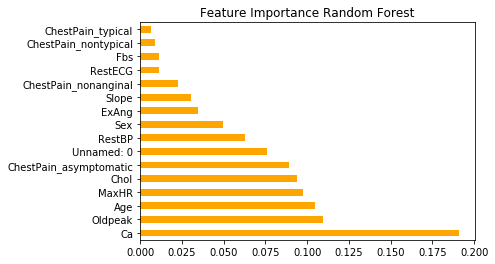

In [156]:
importance_rf = pd.Series(rf.feature_importances_,index=X_train_clean.columns)
importance_rf_sorted = importance_rf.sort_values()
importance_rf_sorted.nlargest(20).plot(kind='barh', color='orange')
plt.title("Feature Importance Random Forest")
plt.show()

##role of pruning in controlling overfitting

In [157]:
max_depth = range(1,20)
train_scores = []
test_scores = []
for a in max_depth:
    tree = RandomForestClassifier(random_state=0,max_depth=a)
    tree.fit(X_train_clean,y_train_clean)
    train_scores.append(tree.score(X_train_clean,y_train_clean))
    test_scores.append(tree.score(X_test_clean,y_test_clean))

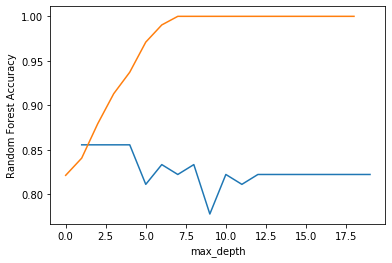

In [158]:
plt.plot(max_depth, test_scores, train_scores)
plt.xlabel('max_depth')
plt.ylabel('Random Forest Accuracy')
plt.show()
#it seems after n_estimators= 5 we tend to overfit.

In [159]:
# Let's implement simple classifiers

classifiers = {
   "LogisiticRegression": LogisticRegression(penalty='none',solver='newton-cg',max_iter=1000),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier()
}

In [160]:
for key,classifier in classifiers.items():
    fit_value=classifier.fit(X_train_clean, y_train_clean)
    training_score = fit_value.score(X_train_clean, y_train_clean)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of",
          round(training_score, 2) * 100, "% accuracy score") 

Classifiers:  LogisticRegression Has a training score of 84.0 % accuracy score
Classifiers:  SVC Has a training score of 62.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 100.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 100.0 % accuracy score


# 4-Boosting Methods

Boosting refers to a family of ensemble methods in which many predictors are
trained sequentially, and each predictor learns from the errors of its predecessor.
In particular, the idea is that new trees are created to reduce the residual errors in
the predictions from the existing sequence of trees. More formally, in boosting many
weak learners are combined to form a strong learner. A weak learner is a model that
performs slightly better than random guessing. We will investigate three Boosting
algorithm: 

the AdaBoost, 
the Gradient Boosting,
the XGBoost and finally 
the CatBoost.

#### 4-1 AdaBoost
AdaBoost is a specific Boosting algorithm developed for classification problems (also called discrete AdaBoost)
In AdaBoost each predictor pays more attention to the instances wrongly predicted by its predecessor,
by constantly changing the weights of training instances.
This process is repeated sequentially, until the N predictors forming the ensemble are trained. An important parameter used in training
is the learning rate η ∈ (0, 1): the learning rate, also called shrinkage, is used
to prevent overfitting since it reduces the influence of each individual learner and
leaves space for future ones to improve the overall ensemble.
Unfortunately, there is a trade-off between learning_rate and the number of trained trees. A smaller value of the learning rate should be compensated by a greater number of estimators

1. Number of Trees in the ensemble (n_estimators), which controls the model complexity;
2. Learning Rate (learning_rate), which controls how strongly each tree tries to correct the mistakes of the previous trees;
3. Pre-pruning (max_depth), which controls the number of levels for each tree.

In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score

dt = DecisionTreeClassifier(max_depth=1)
ada_clf = AdaBoostClassifier(base_estimator=dt,n_estimators=100)
ada_clf.fit(X_train_clean, y_train_clean)

y_pred_proba = ada_clf.predict_proba(X_test_clean)[:,1]

ada_clf_roc_auc = roc_auc_score(y_test_clean, y_pred_proba)

print(format(ada_clf_roc_auc, '.4f'))

0.8915


# 4-2 Gradient Boosting
Indeed,in contrast to AdaBoost, the weights of the training examples are not adjusted
but each predictor is trained using the residual errors of its predecessor as labels.

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=40)
gbc.fit(X_train_clean, y_train_clean)
gbc.score(X_test_clean, y_test_clean)

0.7888888888888889

In [42]:
n_estimators = [30,50,80] # Number of trees
max_depth = [1,3,5] # Maximum n of levels in each tree
learning_rate = [0.001, 0.01, 0.1] # model complexity
param_grid_ = {'n_estimators': n_estimators,
'max_depth': max_depth,
'learning_rate': learning_rate
}

In [43]:
grid = GridSearchCV(gbc,param_grid=param_grid_, cv=5)
grid.fit(X_train_clean,y_train_clean)
print(grid.best_params_)
print(grid.best_score_)
yfit_gbc = grid.predict(X_test_clean)

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50}
0.797444831591173


In [44]:
print(classification_report(y_test_clean,yfit_gbc))

              precision    recall  f1-score   support

           0       0.80      0.88      0.83        49
           1       0.83      0.73      0.78        41

    accuracy                           0.81        90
   macro avg       0.81      0.80      0.81        90
weighted avg       0.81      0.81      0.81        90



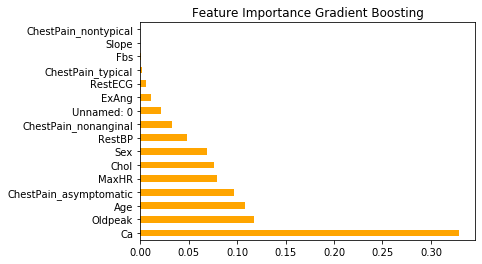

In [45]:
importance_gb = pd.Series(gbc.feature_importances_,index=X_train_clean.columns)
importance_gb_sorted = importance_gb.sort_values()
importance_gb_sorted.nlargest(20).plot(kind='barh',
color='orange')
plt.title("Feature Importance Gradient Boosting")
plt.show()
#Note also that some features were completely ignored to the Gradient Boosting

Practical Tip. If you don’t know which model is the best to apply, go with
Random Forest: it works quite robustly on any kind of data, but it might be slower
than Gradient Boosting, especially on large-scale problems

# 4-3 Extreme Gradient Boosting (XGBoost)???
the core of XGBoost algorithm is parallelizable, it can deal with all of the
processing power of modern multicore computers.
Note that XGBoost should be considered, in principle, for any supervised problem
that satisfies the following criteria:
• the dataset under investigation is characterized by having a set of examples
significantly large than the number of features;
• there are possible outliers in the input space;
• you have a mixture of categorical and continuous variables;
• in Classification tasks, the target is unbalanced
Note also that XGBoost is consistent to missing values, which means that we do not
need to impute any value before fitting.
More technically, XGBoost is based on the principle of weak-learner, where each
predictor could be improved by sequentially training new trees to the model. This
litterally means that the residual errors in the predictions are dynamically correct